<a href="https://colab.research.google.com/github/aceballosGitHub/eda_couse/blob/main/Trabajo_Final_AndresCeballos_JhonatanValencia/EDA_final_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Final Curso Análisis Exploratorio**
 Jhonatan Valencia - Andres Ceballos

1. SMART question:

¿Cuáles parámetros del diseño de fermentaciones con cepas de E. coli nativas y no nativas permiten predecir la concentración final de producto?

2. Obtener datos, cargar dataset y revisar SMART question

In [2]:
!pip install openpyxl
import pandas as pd

# Especifica la ruta del archivo Excel
archivo_excel = "https://github.com/aceballosGitHub/eda_couse/raw/main/Trabajo_Final_AndresCeballos_JhonatanValencia/FermentationDataSet.xlsx"
nombre_hoja = "Data"

# Lee la hoja específica del archivo Excel y carga los datos en un DataFrame
df = pd.read_excel(archivo_excel, sheet_name=nombre_hoja, engine='openpyxl')

# Ahora puedes trabajar con los datos en el DataFrame
print(df.head())

   paper_number  gen_info  env_info  good no_of_designs  cs1  cs1_mw  \
0             1       1.0       1.0     1             1  9.0   92.09   
1             2       0.0       1.0     1             1  1.0  180.16   
2             2       1.0       1.0     1             2  1.0  180.16   
3             2       1.0       1.0     1             3  1.0  180.16   
4             2       1.0       1.0     1             4  1.0  180.16   

      cs_conc1  CS_C1  CS_H1  ...  atp_cost  nadh_nadph_cost     yield  \
0  2714.735585    3.0    8.0  ...       7.0             14.0  0.060000   
1    83.259325    6.0   12.0  ...       5.0             10.0  0.012011   
2    83.259325    6.0   12.0  ...       5.0             10.0  0.016335   
3    83.259325    6.0   12.0  ...       5.0             10.0  0.016947   
4    83.259325    6.0   12.0  ...       7.0             14.0  0.019818   

   yield_o  yield2  titer      rate  fermentation_time  bio_titre  \
0      NaN    0.04  0.936  0.187500                Na

3. Revisar estructura de los datos

In [3]:
df.shape

(1209, 60)

In [4]:
df.head(10)

,paper_number,gen_info,env_info,good,no_of_designs,cs1,cs1_mw,cs_conc1,CS_C1,CS_H1,...,atp_cost,nadh_nadph_cost,yield,yield_o,yield2,titer,rate,fermentation_time,bio_titre,bio_growth_rate
0,1,1.0,1.0,1,1,9.0,92.09,2714.735585,3.0,8.0,...,7.0,14.0,0.060000,NaN,0.04,0.936,0.187500,NaN,NaN,NaN
1,2,0.0,1.0,1,1,1.0,180.16,83.259325,6.0,12.0,...,5.0,10.0,0.012011,NaN,NaN,1.000,0.041667,24.0,NaN,NaN
2,2,1.0,1.0,1,2,1.0,180.16,83.259325,6.0,12.0,...,5.0,10.0,0.016335,NaN,NaN,1.360,0.028333,48.0,NaN,NaN
3,2,1.0,1.0,1,3,1.0,180.16,83.259325,6.0,12.0,...,5.0,10.0,0.016947,NaN,NaN,1.411,0.029396,48.0,NaN,NaN
4,2,1.0,1.0,1,4,1.0,180.16,83.259325,6.0,12.0,...,7.0,14.0,0.019818,NaN,NaN,1.650,0.068750,24.0,NaN,NaN
5,2,1.0,1.0,1,5,1.0,180.16,83.259325,6.0,12.0,...,6.0,12.0,0.024141,NaN,NaN,2.010,0.041875,48.0,NaN,NaN
6,2,1.0,1.0,1,6,1.0,180.16,83.259325,6.0,12.0,...,6.0,12.0,0.023901,NaN,NaN,1.990,0.041458,48.0,NaN,NaN
7,2,1.0,1.0,1,7,1.0,180.16,83.259325,6.0,12.0,...,5.0,10.0,0.100443,NaN,NaN,0.990,0.041250,24.0,NaN,NaN
8,2,1.0,1.0,1,8,1.0,180.16,83.259325,6.0,12.0,...,5.0,10.0,0.103663,NaN,NaN,1.000,0.041667,24.0,NaN,NaN
9,2,1.0,1.0,1,9,1.0,180.16,83.259325,6.0,12.0,...,5.0,10.0,0.107429,NaN,NaN,0.980,0.040833,24.0,NaN,NaN


4. Dividir entre categóricos y numéricos

Se utiliza "types" para identificar cuales son categóricos

In [5]:
print(df.dtypes)

paper_number                                 int64
gen_info                                   float64
env_info                                   float64
good                                         int64
no_of_designs                               object
cs1                                        float64
cs1_mw                                     float64
cs_conc1                                   float64
CS_C1                                      float64
CS_H1                                      float64
CS_O1                                      float64
cs2                                          int64
cs2_mw                                     float64
cs_conc2                                   float64
CS_C2                                      float64
CS_H2                                      float64
CS_O2                                      float64
cs3                                          int64
cs3_mw                                     float64
cs_conc3                       

In [6]:
df.describe(include = "all") #incluye numéricas y categóricas

,paper_number,gen_info,env_info,good,no_of_designs,cs1,cs1_mw,cs_conc1,CS_C1,CS_H1,...,atp_cost,nadh_nadph_cost,yield,yield_o,yield2,titer,rate,fermentation_time,bio_titre,bio_growth_rate
count,1209.000000,1203.000000,1203.000000,1209.000000,1209.0,1191.000000,1105.000000,1175.000000,1105.000000,1105.000000,...,373.000000,390.000000,769.000000,77.000000,177.000000,1128.000000,782.000000,975.000000,282.000000,151
unique,NaN,NaN,NaN,NaN,133.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84
top,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KJ122-pKJSUC at the 24th transfer during metab...
freq,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
mean,50.647643,0.924356,0.883624,0.980976,NaN,3.967254,168.077376,276.874662,5.610860,11.561086,...,2.715818,6.755769,1.727243,3.825614,17.833387,25.180578,0.401238,68.655903,4.987187,NaN
std,31.135305,0.264538,0.320808,0.136666,NaN,4.418042,52.629842,543.878939,1.867599,2.853317,...,3.405355,5.783403,9.691727,16.131892,52.500527,71.991499,1.098821,158.369221,11.215627,NaN
min,1.000000,0.000000,0.000000,0.000000,NaN,1.000000,87.050000,0.000000,3.000000,3.000000,...,-2.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.070000,NaN
25%,26.000000,1.000000,1.000000,1.000000,NaN,1.000000,180.160000,108.589423,6.000000,12.000000,...,0.000000,1.000000,0.057600,0.296360,1.076923,0.497650,0.015423,24.000000,0.533750,NaN
50%,45.000000,1.000000,1.000000,1.000000,NaN,1.000000,180.160000,138.765542,6.000000,12.000000,...,0.000000,4.000000,0.255088,0.733071,6.795455,2.597135,0.058333,40.000000,1.280000,NaN
75%,78.000000,1.000000,1.000000,1.000000,NaN,9.000000,180.160000,277.531083,6.000000,12.000000,...,6.000000,12.000000,0.682609,0.939348,22.560000,14.802830,0.367909,72.000000,2.200000,NaN


Eliminar columnas que no aportan al objetivo

Criterios:
- Cantidad de nulos
- Información general que no está relacionada con la productividad

In [7]:
df.isna().sum() #identificar cuales tienen nulos

paper_number                                  0
gen_info                                      6
env_info                                      6
good                                          0
no_of_designs                                 0
cs1                                          18
cs1_mw                                      104
cs_conc1                                     34
CS_C1                                       104
CS_H1                                       104
CS_O1                                       104
cs2                                           0
cs2_mw                                       16
cs_conc2                                      0
CS_C2                                        16
CS_H2                                        16
CS_O2                                        16
cs3                                           0
cs3_mw                                        0
cs_conc3                                      0
CS_C3                                   

In [8]:
#Con los criterios mencionados y conocimiento del proceso, se seleccionan solo las columans de interes (en lugar de eliminar las que no aportan)
df = df.dropna(subset=['titer']) #Eliminar registros con nulos en la variable dependiente

df_selected = df.iloc[:, 5:28]  # Columnas del 6 al 28 (condiciones de cultivo)
df_selected['product_name'] = df['product_name']
df_selected['titer'] = df['titer']
df_selected['fermentation_time'] = df['fermentation_time']
df_selected.shape

(1128, 26)

In [9]:
categorical_variables = df_selected.select_dtypes(include=['object', 'category'])
numeric_variables = df_selected.select_dtypes(exclude=['object', 'category'])

5. Análisis univariado de categóricos

In [10]:
print(df_selected.dtypes)

cs1                  float64
cs1_mw               float64
cs_conc1             float64
CS_C1                float64
CS_H1                float64
CS_O1                float64
cs2                    int64
cs2_mw               float64
cs_conc2             float64
CS_C2                float64
CS_H2                float64
CS_O2                float64
cs3                    int64
cs3_mw               float64
cs_conc3             float64
CS_C3                float64
CS_H3                float64
CS_O3                float64
reactor_type         float64
rxt_volume           float64
media                 object
temp                 float64
oxygen               float64
product_name          object
titer                float64
fermentation_time    float64
dtype: object


<Figure size 1000x600 with 0 Axes>

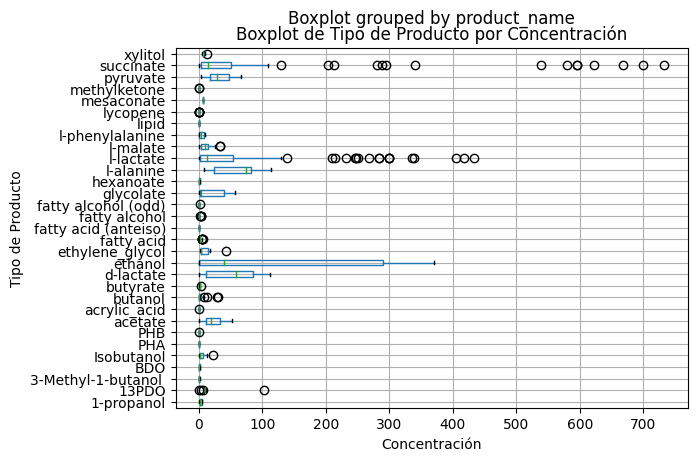

In [11]:
#Boxplot
import pandas as pd
import matplotlib.pyplot as plt

# Graficar el boxplot
plt.figure(figsize=(10, 6))  # Tamaño de la figura
df_selected.boxplot(column='titer', by='product_name', vert=False)  # Boxplot con 'tipo_producto' en y y 'concentracion' en x
plt.xlabel('Concentración')  # Etiqueta del eje x
plt.ylabel('Tipo de Producto')  # Etiqueta del eje y
plt.title('Boxplot de Tipo de Producto por Concentración')  # Título de la gráfica
plt.grid(True)  # Mostrar rejilla en la gráfica
plt.show()  # Mostrar la gráfica


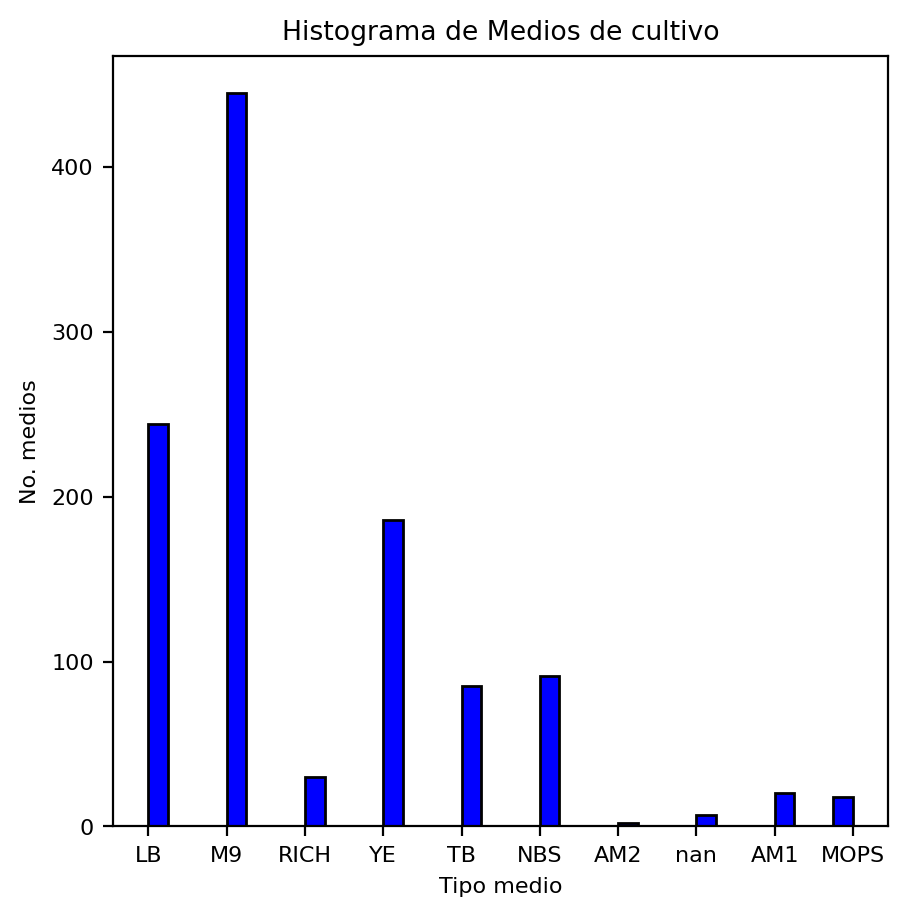

In [12]:
#Histograma para composición del medio
import matplotlib
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.dpi'] = 200

matplotlib.rcParams['figure.figsize'] = [5, 5]

#   histograma con matplotlib, bins debe ser entero

# vr min = -10 y máximo 160, el total es 180, el tamaño del bin es 5 180/5

df_selected['media'] = df_selected['media'].astype(str)

plt.hist(df_selected['media'], color = 'blue', edgecolor = 'black', bins = int(180/5))

# Configuramos la gráfica

plt.title('Histograma de Medios de cultivo')
plt.xlabel('Tipo medio'); plt.ylabel('No. medios');

In [13]:
df_selected.head()

,cs1,cs1_mw,cs_conc1,CS_C1,CS_H1,CS_O1,cs2,cs2_mw,cs_conc2,CS_C2,...,CS_H3,CS_O3,reactor_type,rxt_volume,media,temp,oxygen,product_name,titer,fermentation_time
0,9.0,92.09,2714.735585,3.0,8.0,3.0,0,0.0,0.0,0.0,...,0.0,0.0,3.0,6.00,LB,30.0,1.0,fatty acid,0.936,NaN
1,1.0,180.16,83.259325,6.0,12.0,6.0,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.05,LB,30.0,1.0,fatty acid,1.000,24.0
2,1.0,180.16,83.259325,6.0,12.0,6.0,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.05,LB,30.0,1.0,fatty acid,1.360,48.0
3,1.0,180.16,83.259325,6.0,12.0,6.0,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.05,LB,30.0,1.0,fatty acid,1.411,48.0
4,1.0,180.16,83.259325,6.0,12.0,6.0,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.05,LB,30.0,1.0,fatty acid,1.650,24.0


6. Análisis univariado de numéricos

7. Análisis multivariado

Se realizó label encoding a:
- Oxygen
- reactor_type
- Cs1, Cs2 y Cs3 (tipos de fuentes de carbono)

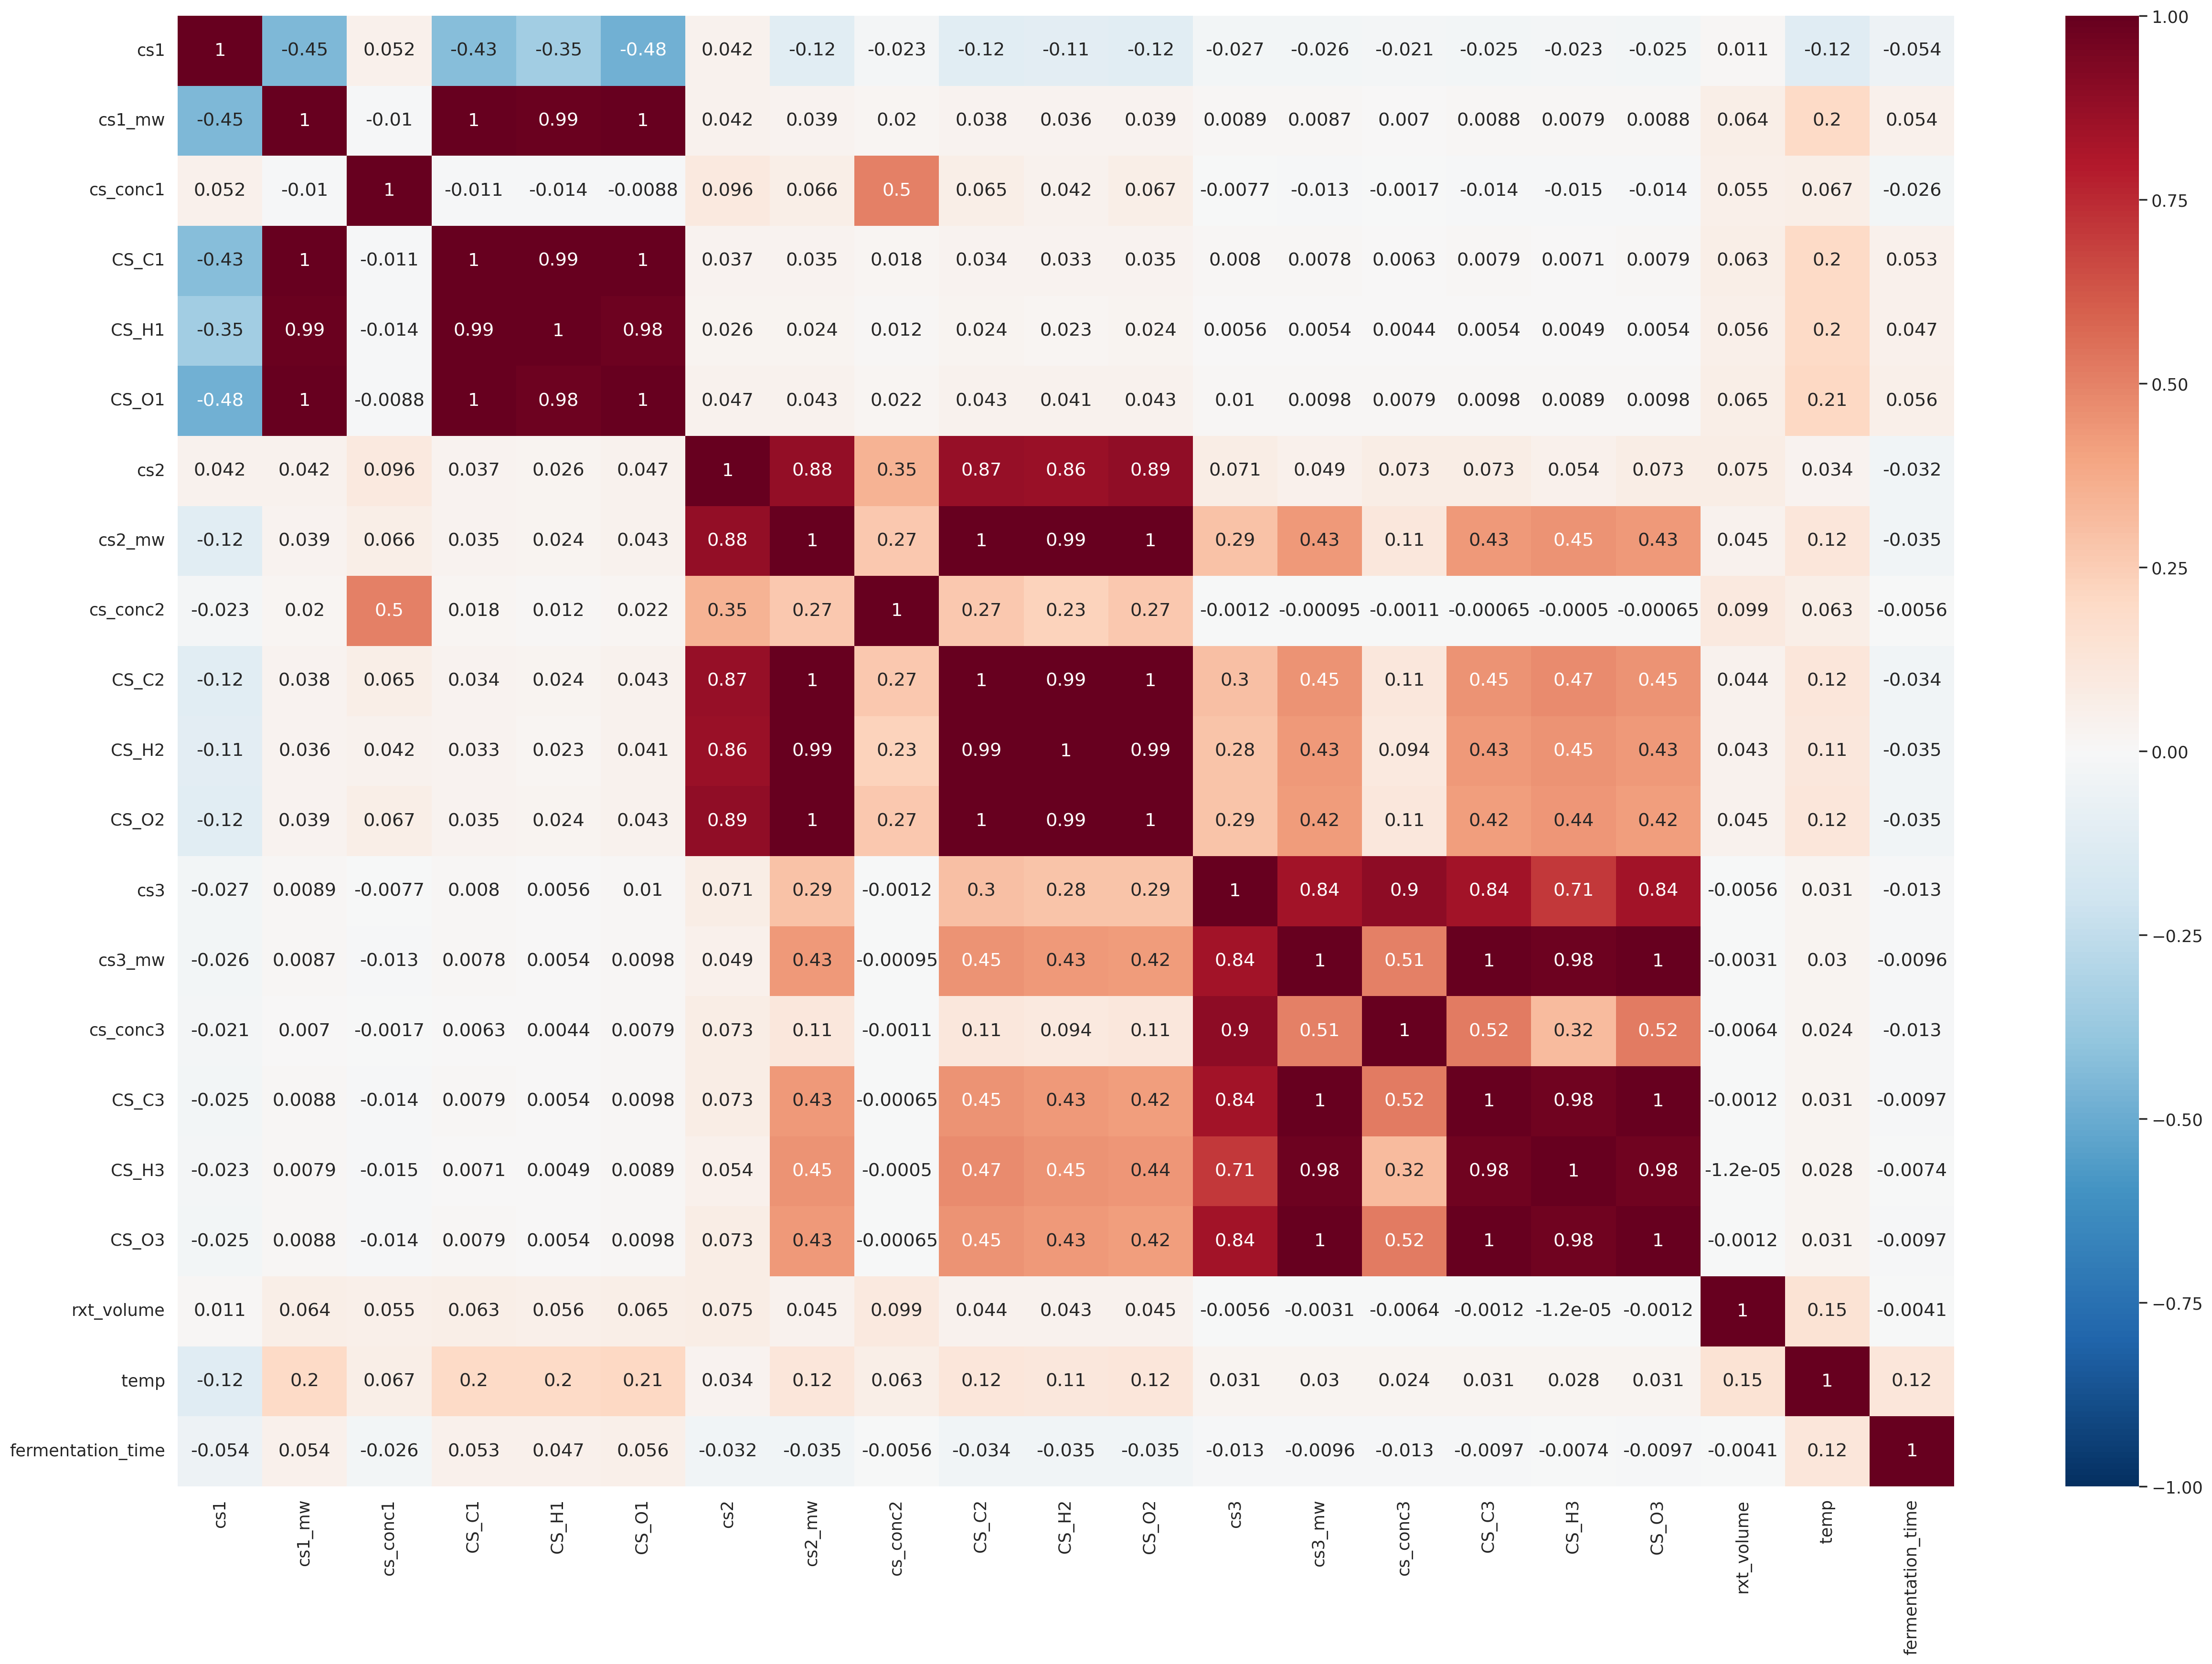

In [14]:
import seaborn as sns

SelectedNumericVariables = numeric_variables.drop(['titer', 'reactor_type', 'oxygen'], axis=1)

sns.set(font_scale=1.15)
plt.figure(figsize=(30,20))
sns.heatmap(SelectedNumericVariables.corr(),
            cmap='RdBu_r',
            annot=True,
            vmin=-1, vmax=1);

Se evidencia una fuerte correlación en las características de las fuentes de carbono. Se obtuvieron coeficientes de correlación mayores a 0.9 para el peso molecular de la fuente, el tipo de fuente, la concentración de esta y su composición en términos de carbono, hidrógeno y oxígeno.

Teniendo en cuenta esto, se eliminan las tres columnas referentes a cantidad de carbono, hidrógeno y oxígeno para cada fuente de carbono y se verifica nuevamente correlación.

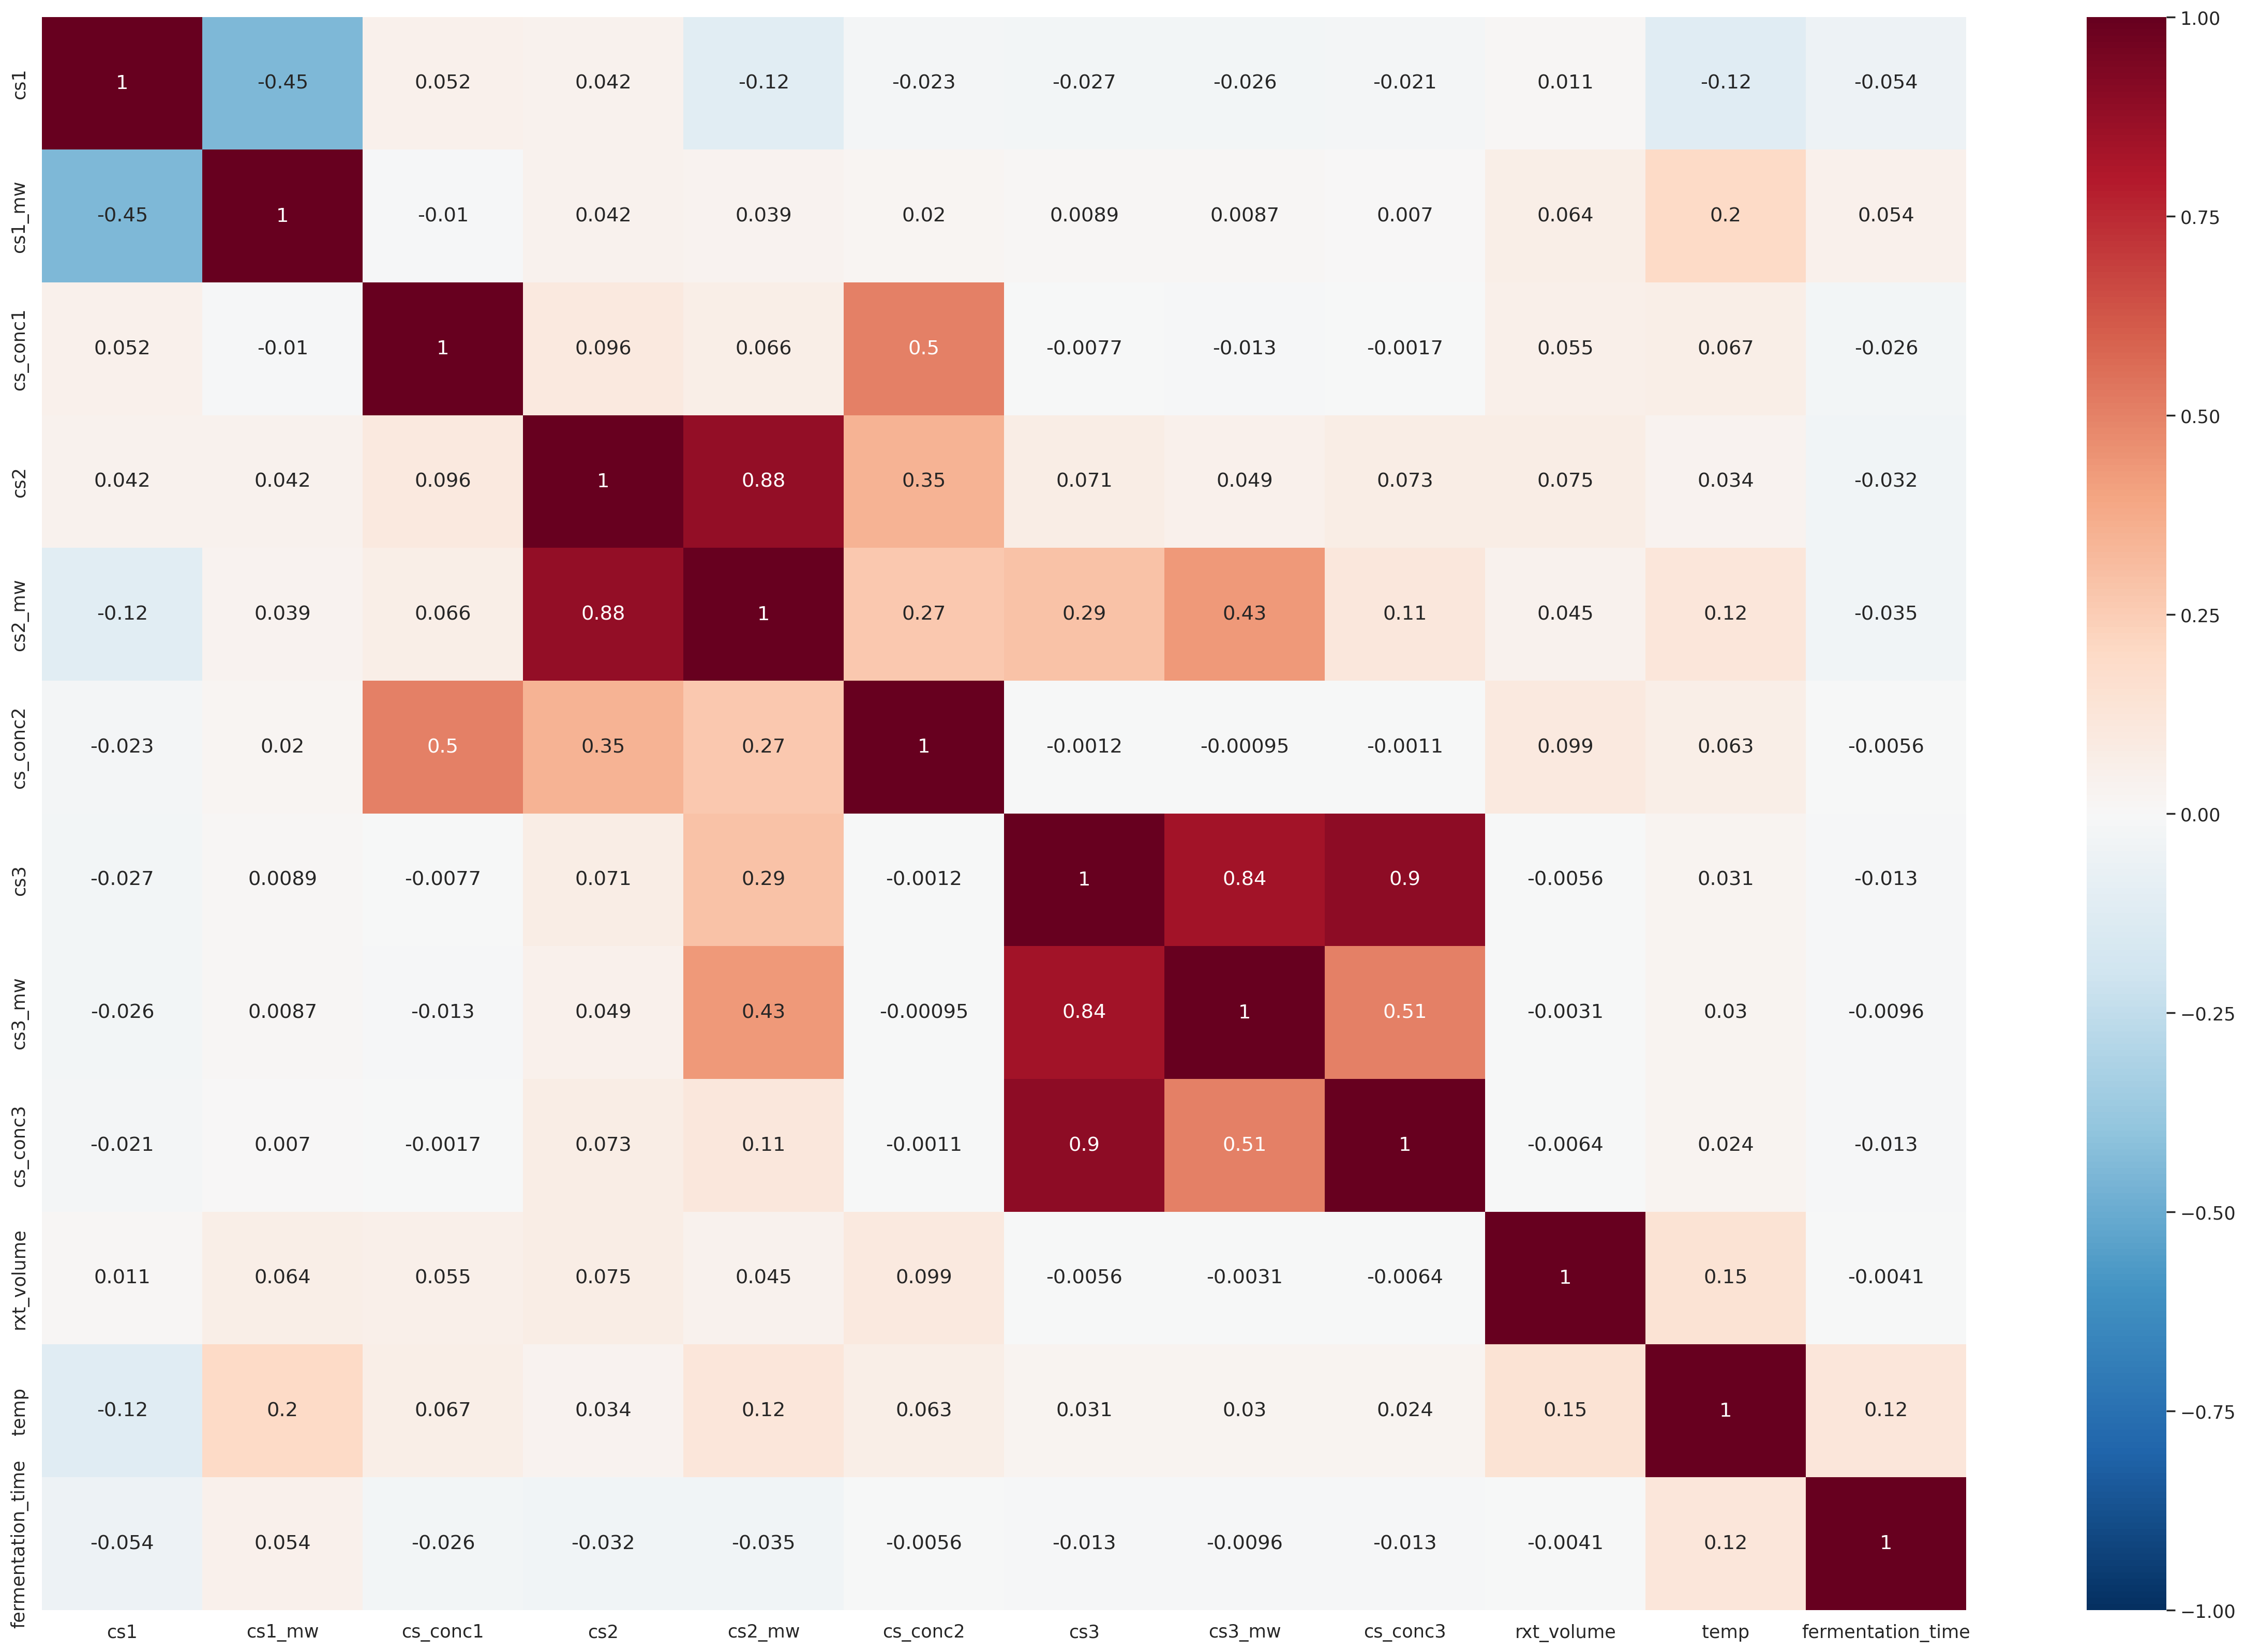

In [15]:
SelectedNumericVariables = SelectedNumericVariables.drop(['CS_C1', 'CS_H1', 'CS_O1', 'CS_C2', 'CS_H2', 'CS_O2', 'CS_C3', 'CS_H3', 'CS_O3'], axis=1)
sns.set(font_scale=1.15)
plt.figure(figsize=(30,20))
sns.heatmap(SelectedNumericVariables.corr(),
            cmap='RdBu_r',
            annot=True,
            vmin=-1, vmax=1);

Con estos resultados, se toma la decisión de eliminar el peso molecular del sustrato 2, el peso molecular del sustrato 3 y la concentración del sustrato 3.

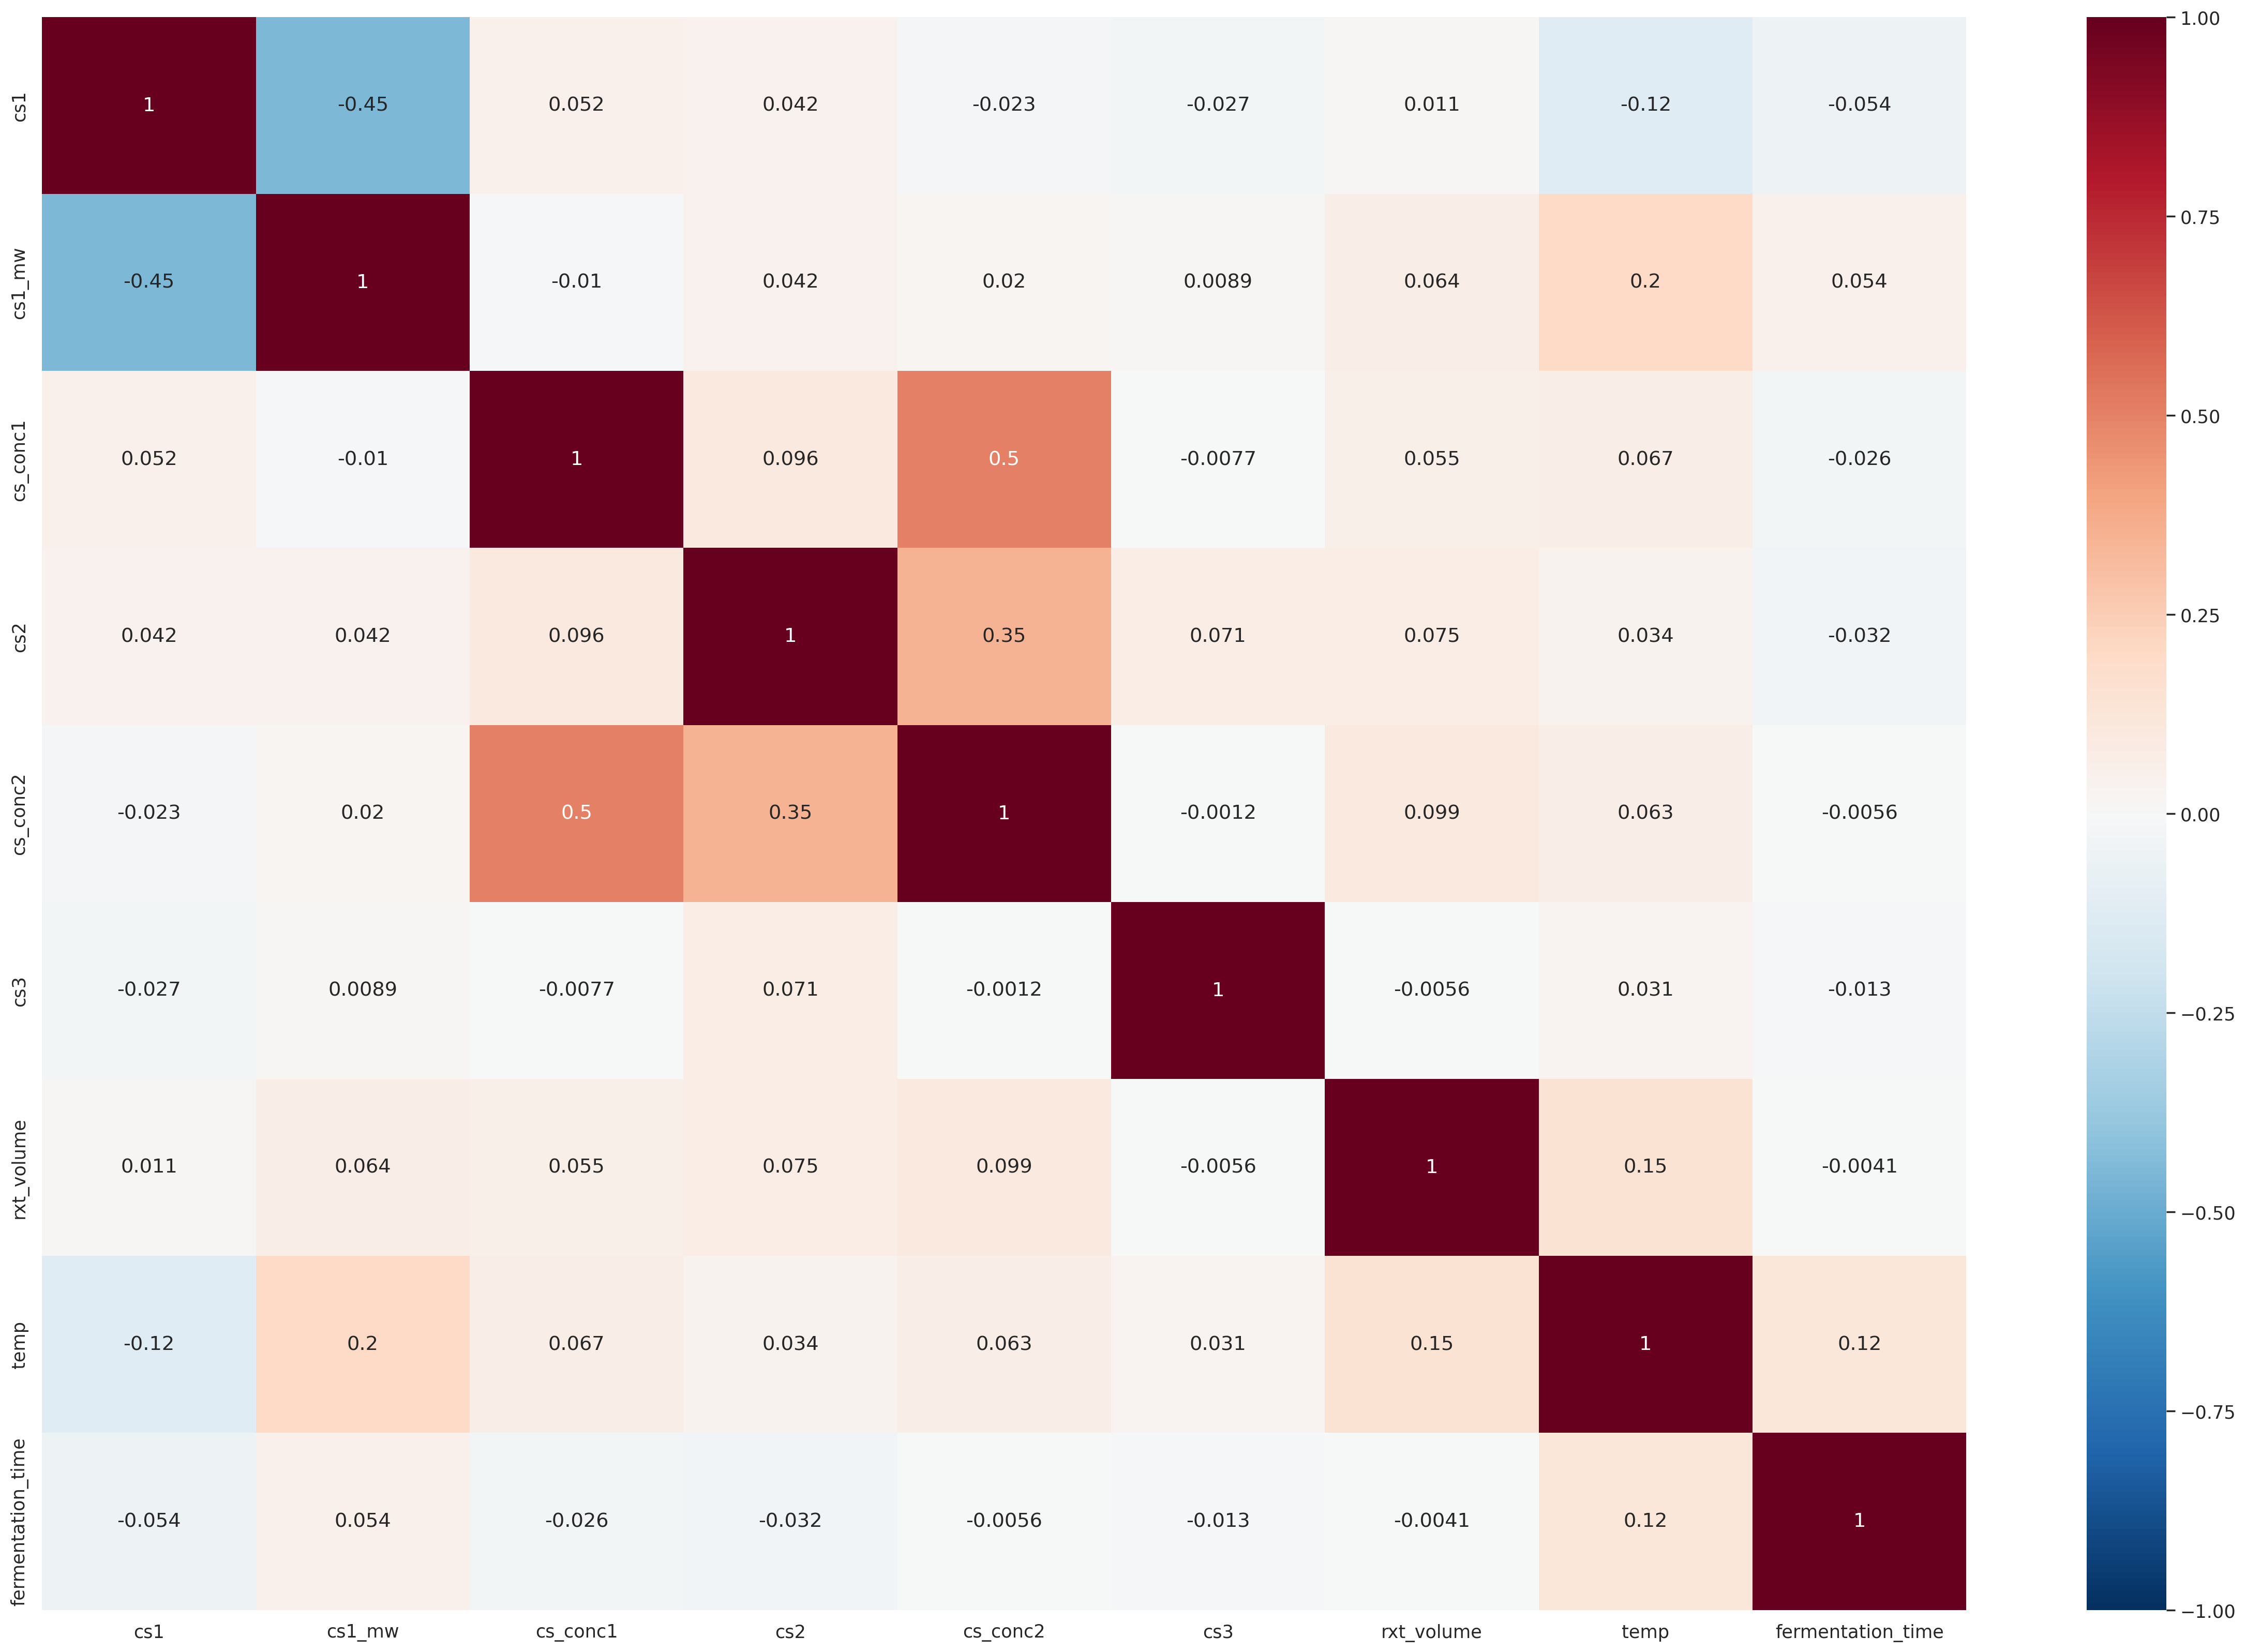

In [16]:
SelectedNumericVariables = SelectedNumericVariables.drop(['cs2_mw', 'cs3_mw', 'cs_conc3'], axis=1)
sns.set(font_scale=1.15)
plt.figure(figsize=(30,20))
sns.heatmap(SelectedNumericVariables.corr(),
            cmap='RdBu_r',
            annot=True,
            vmin=-1, vmax=1);

Análisis de correlación entre reactor_typ y titer

<Figure size 400x400 with 0 Axes>

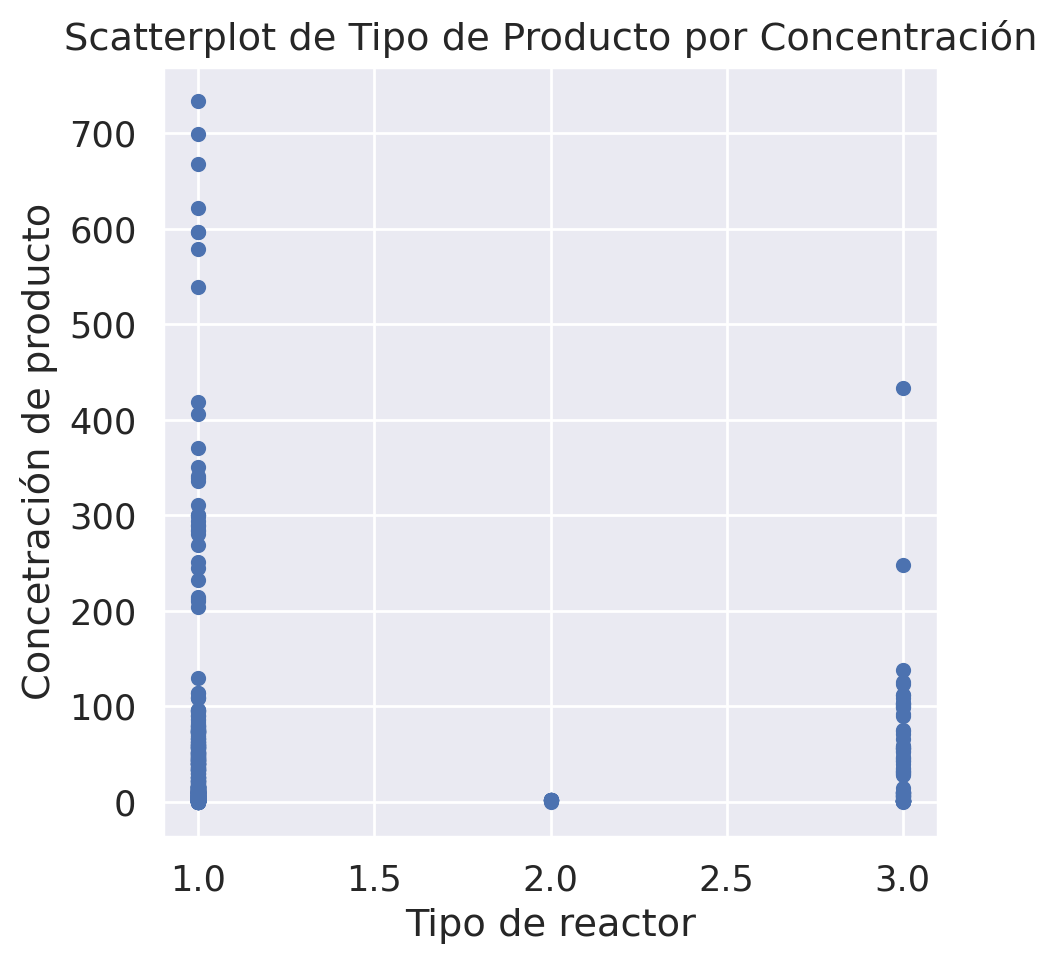

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Graficar el boxplot
plt.figure(figsize=(2, 2))  # Tamaño de la figura
df_selected.plot.scatter(y='titer', x='reactor_type')  # Boxplot con 'tipo_producto' en y y 'concentracion' en x
plt.xlabel('Tipo de reactor')  # Etiqueta del eje x
plt.ylabel('Concetración de producto')  # Etiqueta del eje y
plt.title('Scatterplot de Tipo de Producto por Concentración')  # Título de la gráfica
plt.grid(True)  # Mostrar rejilla en la gráfica
plt.show()  # Mostrar la gráfica


<Figure size 400x400 with 0 Axes>

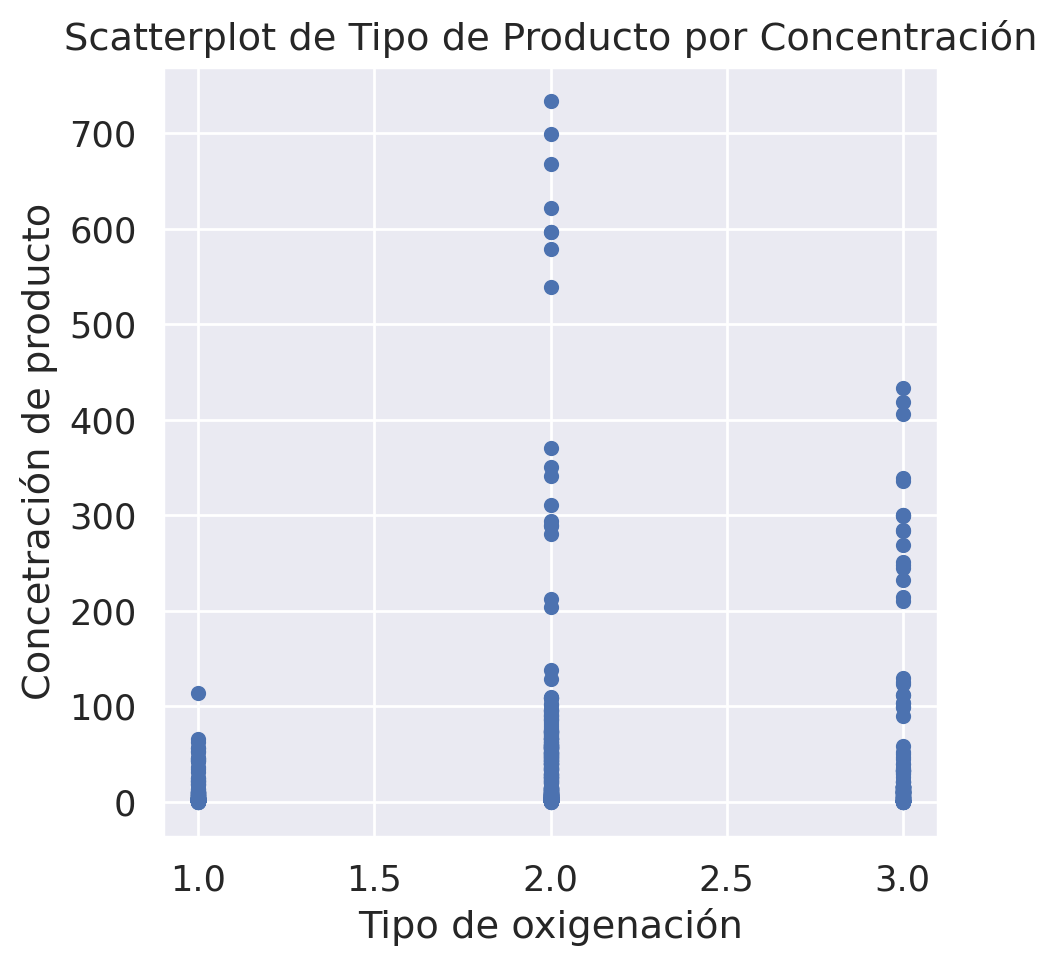

In [18]:
# Graficar el boxplot
plt.figure(figsize=(2, 2))  # Tamaño de la figura
df_selected.plot.scatter(y='titer', x='oxygen')  # Boxplot con 'tipo_producto' en y y 'concentracion' en x
plt.xlabel('Tipo de oxigenación')  # Etiqueta del eje x
plt.ylabel('Concetración de producto')  # Etiqueta del eje y
plt.title('Scatterplot de Tipo de Producto por Concentración')  # Título de la gráfica
plt.grid(True)  # Mostrar rejilla en la gráfica
plt.show()  # Mostrar la gráfica

8. Imputación de valores nulos para llegar a un modelo

In [19]:
# Es deseable tener en cuenta la varaible "media" para la preducción. Por lo cual, se realiza un label encoding.
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Creamos una instancia de label encoder
lab = LabelEncoder()

SelectedNumericVariables['media'] = lab.fit_transform(categorical_variables['media'])
SelectedNumericVariables.head(100)


,cs1,cs1_mw,cs_conc1,cs2,cs_conc2,cs3,rxt_volume,temp,fermentation_time,media
0,9.0,92.09,2714.735585,0,0.0,0,6.000,30.0,NaN,2
1,1.0,180.16,83.259325,0,0.0,0,0.050,30.0,24.0,2
2,1.0,180.16,83.259325,0,0.0,0,0.050,30.0,48.0,2
3,1.0,180.16,83.259325,0,0.0,0,0.050,30.0,48.0,2
4,1.0,180.16,83.259325,0,0.0,0,0.050,30.0,24.0,2
...,...,...,...,...,...,...,...,...,...,...
95,1.0,180.16,111.012433,0,0.0,0,0.005,37.0,72.0,3
96,1.0,180.16,111.012433,0,0.0,0,0.005,37.0,72.0,3
97,1.0,180.16,111.012433,0,0.0,0,0.005,37.0,72.0,3
98,1.0,180.16,111.012433,0,0.0,0,0.005,37.0,72.0,3


In [20]:
Predictores = SelectedNumericVariables.iloc[:,:]
Predictores['reactor_type'] = numeric_variables['reactor_type']
Predictores['oxygen'] = numeric_variables['oxygen']

Predictores.head()

,cs1,cs1_mw,cs_conc1,cs2,cs_conc2,cs3,rxt_volume,temp,fermentation_time,media,reactor_type,oxygen
0,9.0,92.09,2714.735585,0,0.0,0,6.00,30.0,NaN,2,3.0,1.0
1,1.0,180.16,83.259325,0,0.0,0,0.05,30.0,24.0,2,1.0,1.0
2,1.0,180.16,83.259325,0,0.0,0,0.05,30.0,48.0,2,1.0,1.0
3,1.0,180.16,83.259325,0,0.0,0,0.05,30.0,48.0,2,1.0,1.0
4,1.0,180.16,83.259325,0,0.0,0,0.05,30.0,24.0,2,1.0,1.0


In [21]:
#Aquí imputamos todos los predictores
#Entrenamos un modelo
Predictores.isna().sum()

cs1                   18
cs1_mw                98
cs_conc1              34
cs2                    0
cs_conc2               0
cs3                    0
rxt_volume           116
temp                  38
fermentation_time    183
media                  0
reactor_type         129
oxygen               103
dtype: int64

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

sns.set_theme(style="whitegrid")


# imputer_knn = KNNImputer(n_neighbors=6)
# df_knn_imputed = imputer_knn.fit_transform(Predictores)
# df_knn_imputed = pd.DataFrame(df_knn_imputed)
# df_knn_imputed.isna().sum()


# Construimos el modelo
imputer = KNNImputer(n_neighbors=5, weights="uniform")

#Creamos un nuevo dataframe
df_knnI= Predictores.copy()

#Creamos un loop para recorrer todas las columnas que queremos modificar

for column in Predictores:

  # Entrenamos el modelo
  imputer.fit(Predictores[[column]])
  #Reemplazamos los valores nulos
  df_knnI[column] = imputer.transform(Predictores[[column]]).ravel()

df_knnI.isna().sum()

cs1                  0
cs1_mw               0
cs_conc1             0
cs2                  0
cs_conc2             0
cs3                  0
rxt_volume           0
temp                 0
fermentation_time    0
media                0
reactor_type         0
oxygen               0
dtype: int64

9. Hacer un modelo predictivo

In [25]:
# Entrenar un modelo predictivo

from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

#df_knnI son los predictores previamente imputados
Objectivo = df_selected['titer']

#Usando el método LinearSVR
regr = make_pipeline(StandardScaler(), LinearSVR(dual=False, random_state=0, tol=1e-5, loss="squared_epsilon_insensitive"))
regr.fit(df_knnI, Objectivo)

regr.score(df_knnI, Objectivo)

0.20934409175913304

Este dataframe considera datos de fermentaciones de distintos productos. Por las particularidades de cada proceso de fermentación, sería incorrecto imputar teniendo en cuenta todo el set de datos.
Entonces, una forma apropiada de imputar debería tener en cuenta el tipo de producto generado en cada fermentación


In [26]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128 entries, 0 to 1207
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cs1                1110 non-null   float64
 1   cs1_mw             1030 non-null   float64
 2   cs_conc1           1094 non-null   float64
 3   CS_C1              1030 non-null   float64
 4   CS_H1              1030 non-null   float64
 5   CS_O1              1030 non-null   float64
 6   cs2                1128 non-null   int64  
 7   cs2_mw             1112 non-null   float64
 8   cs_conc2           1128 non-null   float64
 9   CS_C2              1112 non-null   float64
 10  CS_H2              1112 non-null   float64
 11  CS_O2              1112 non-null   float64
 12  cs3                1128 non-null   int64  
 13  cs3_mw             1128 non-null   float64
 14  cs_conc3           1128 non-null   float64
 15  CS_C3              1041 non-null   float64
 16  CS_H3              1041 

A continuación se deja constancia de uno de los intentos para ordenar las imputaciones de los datos por Tipor de Producto y la lógica de como debería ser el código (aún por seguir trabajando)

In [30]:
#Algoritmo para imputar por producto
#Predictores contiene solo numéricos (incluyenbdo tranformados) y está sin imuputar pero no contiene la columna de producto. Sin embargo tiene los mismos registros que df_selected. Entonces
#df_selected se usa para buscar el producto y se imputa en Predictores
df_temporal = pd.DataFrame()
df_to_append = pd.DataFrame()
for j in df_selected.columns:
    for i in df_selected.index:
        if pd.isna(df_selected.loc[i, j]):
            contador = 0
            # df_temporal.dropna(how='all', inplace=True)
            for k in df_selected.index:
                if df_selected.loc[k, df_selected.columns[23]] == df_selected.loc[i, df_selected.columns[23]]:
                    # df_temporal = df_temporal.append(df_selected.loc[k, j])
                    df_to_append = pd.DataFrame([df_selected.loc[k, df_selected.columns[23]]], columns=[1], index=[1])
                    df_temporal = df_temporal.concat(df_to_append)




AttributeError: 'DataFrame' object has no attribute 'concat'

In [28]:
df_to_append.shape

(1, 1)

In [29]:
Predictores.shape

(1128, 12)